Cегментирование изображений с помощью глубоких нейросетевых архитектур на примере Mask R-CNN.

Мы воспользуемся уже обученной моделью. Установим требуемые библиотеки.

In [ ]:
!pip install -q tensorflow==2.4.3
!pip install -q keras==2.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.6/394.6 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 KB 38.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 80.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
xarray-einstats 0.5.1 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.


Клонируем репозиторий с исходниками. Импортируем требуемые библиотеки

In [ ]:
!git clone https://github.com/dvolchek/Mask_RCNN.git
%cd /content/Mask_RCNN
!python -q /content/Mask_RCNN/setup.py install

from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 981, done.
remote: Total 981 (delta 0), reused 0 (delta 0), pack-reused 981
Receiving objects: 100% (981/981), 137.72 MiB | 11.11 MiB/s, done.
Resolving deltas: 100% (570/570), done.
/content/Mask_RCNN
/usr/local/lib/python3.8/dist-packages/setuptools/dist.py:697: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/setuptools/dist.py:697: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/setuptools/dist.py:697: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  warnings.warn(
running install
running bdist_egg
runni

Создаем конфигурацию, определяем поля

In [ ]:
class MaskRCNNConfig(Config):
    NAME = "coco_pretrained_model_config"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.8 # минимальный процент отображения прямоугольника
    NUM_CLASSES = 81

Загружаем файл с весами

In [ ]:
import os
import mrcnn.utils
DATASET_FILE = "mask_rcnn_coco.h5"
if not os.path.exists(DATASET_FILE):
    mrcnn.utils.download_trained_weights(DATASET_FILE)

... done downloading pretrained model!


Создаем модель

In [ ]:
model = modellib.MaskRCNN(mode="inference", model_dir=os.getcwd(), config=MaskRCNNConfig())

NameError: ignored

Загружаем веса

In [ ]:
model.load_weights(DATASET_FILE, by_name=True)

NameError: ignored

Из директории Mask_RCNN/images/ выбираем любой файл

In [ ]:
import random
import cv2
import imutils
from google.colab.patches import cv2_imshow
#DIR = '/content/Mask_RCNN/images'
#file = random.choice(os.listdir(DIR))
#file = os.path.join(DIR, file)
#print(file)

#file = 'Sheeps.jpg'
#file = os.path.join(file)
#print(file)
#image = cv2.imread(file)
#cv2_imshow(image)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = imutils.resize(image, width=512)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  223k  100  223k    0     0   157k      0  0:00:01  0:00:01 --:--:--  157k


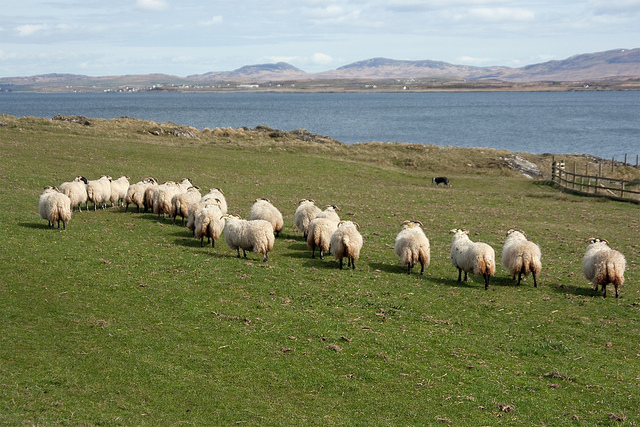

In [ ]:
!curl -o logo.png https://courses.openedu.ru/assets/courseware/v1/65d6b31fba048e1e275378ec9760bb8c/asset-v1:ITMOUniversity+ADVMLDEEPLEARN+fall_2022_ITMO+type@asset+block/Comp_Vision_Task_5_File_2.jpg
import cv2
img = cv2.imread('first.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = imutils.resize(img, width=512)

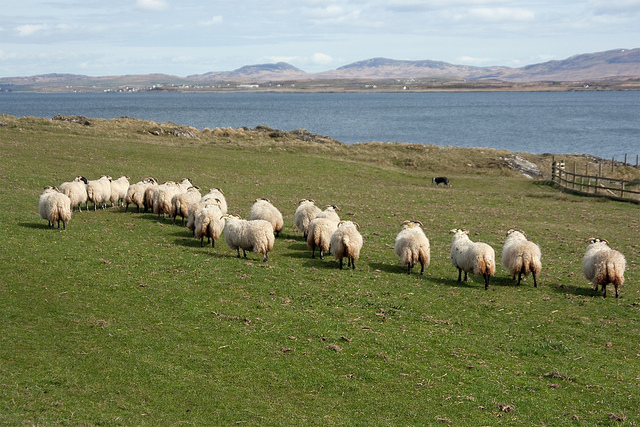

In [ ]:
cv2_imshow(img)

Запускаем модель

In [ ]:
r = model.detect([image], verbose=1)[0]

Processing 1 images
image                    shape: (341, 512, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:2323: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Результаты работы модели находятся в словаре:

*   rois -- bounding boxes обнаруженных объектов
*   class_ids -- метки назначенных классов
*   scores -- вероятности отнесения к назначенным классам
*   masks -- маски -- результат сегментации






Данная модель способна определить более 80 различных объектов. Соответствующий файл скачивается в формате .json, который нетрудно распарсить средствами питона. Но для данной темы достаточно определить эти типы объектов явным образом.

In [ ]:
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
img_2 = img.copy()

Что мы ожидаем увидеть? На выбранном изображении модель найдет все объекты из списка и сегментирует их.

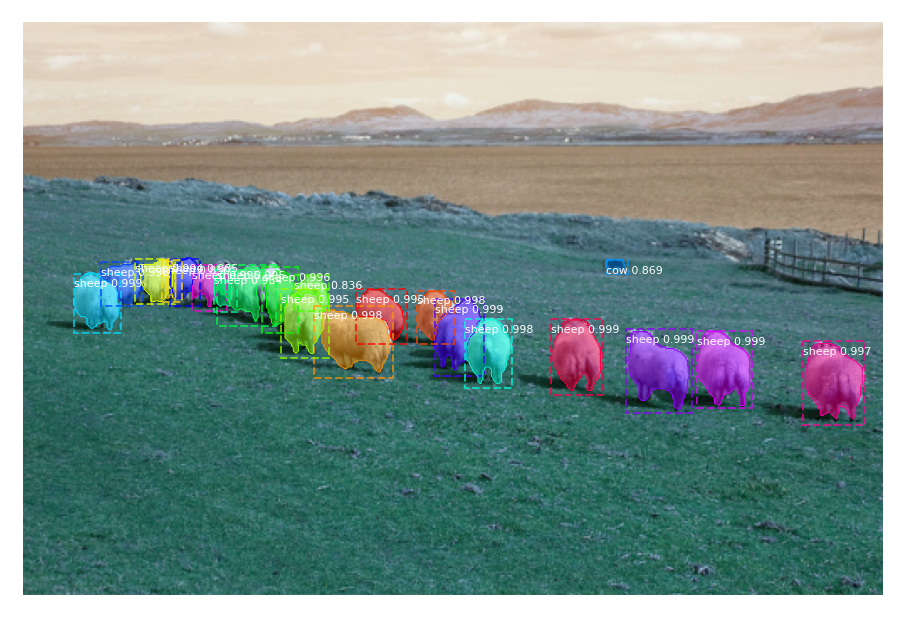

In [ ]:
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            CLASS_NAMES, r['scores'])


In [ ]:
cv2_imshow(visualize.apply_mask(img_2, r['masks'][:,:,12], color=(0,255,255)))

ValueError: ignored

In [ ]:
r['rois']

array([[183, 401, 229, 434],
       [176, 314, 221, 345],
       [182, 359, 232, 398],
       [149,  30, 184,  58],
       [164, 245, 210, 274],
       [176, 263, 217, 291],
       [168, 173, 211, 220],
       [159, 234, 191, 256],
       [142,  46, 168,  71],
       [189, 464, 239, 501],
       [145, 142, 184, 163],
       [158, 153, 199, 182],
       [158, 198, 191, 228],
       [144, 100, 171, 121],
       [144, 115, 180, 150],
       [140,  66, 167,  90],
       [140,  87, 168, 105],
       [147, 113, 172, 127],
       [141, 347, 149, 360],
       [141,  82, 166,  94],
       [150, 161, 171, 182]], dtype=int32)

In [ ]:
r['masks'].shape

In [ ]:
best_sheep = -1e9
best_sheep_id = 0
for i in r['rois']:
  m = abs(i[0]-i[1]) * abs(i[2]-i[3])
  if m > best_sheep:
    best_sheep = m
    best_sheep_id = i

In [ ]:
best_sheep_id

array([189, 464, 239, 501], dtype=int32)

In [ ]:
import numpy as np
np.where(r['rois'] == best_sheep_id)

In [ ]:
np.round(r['scores'][9],3)

In [ ]:
height = r['rois'][9][2]-r['rois'][9][0]

In [ ]:
weight = r['rois'][9][3]-r['rois'][9][1]

In [ ]:
weight, height

In [ ]:
r['masks'][:,:,12]

In [ ]:
best_sheep_pixels = len(list(zip(*np.where(r['masks'][:,:,12] == True))))

In [ ]:
r['masks'].shape

In [ ]:
np.round(best_sheep_pixels/(427*640),3)

In [ ]:
r['masks'].shape[2]

In [ ]:
sheeps_sq = [len(list(zip(*np.where(r['masks'][:,:,m] == True)))) for m in range(r['masks'].shape[2])]

In [ ]:
sheeps_sq[9]

In [ ]:
np.where(np.round(r['scores'],3) == 0.995)

In [ ]:
r['rois'][9][2] - r['rois'][9][0]

In [ ]:
r['rois'][9][3] - r['rois'][9][1]

In [ ]:
r['rois'][9]